In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df = pd.read_excel('indonesian_insurance_gdp.xlsx')
df.head()

,year,life premi,non life premi,private con,gov ex,inestment,trade,inflation,gdp
0,1996,0.505871,0.644390,62.36,7.566959,31.60,52.264744,8.676510,227370000000
1,1997,0.560647,0.610687,61.68,6.842805,30.31,55.993859,12.571376,215749000000
2,1998,0.480243,0.666057,67.78,5.693508,27.43,96.186192,75.271169,95445547873
3,1999,0.464260,0.554159,73.94,6.604457,22.14,62.943913,14.161196,140001000000
4,2000,0.492913,0.499936,61.65,6.531995,22.25,71.436876,20.447457,165021000000


In [3]:
#untuk cek value 0 / NaN
df.isnull().sum()

year              0
life premi        0
non life premi    0
private con       0
gov ex            0
inestment         0
trade             0
inflation         0
gdp               0
dtype: int64

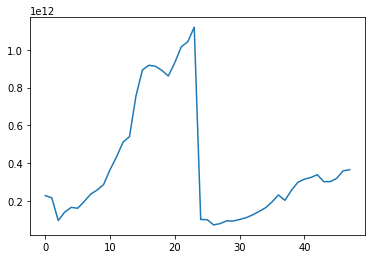

In [14]:
df['gdp'].plot.line()

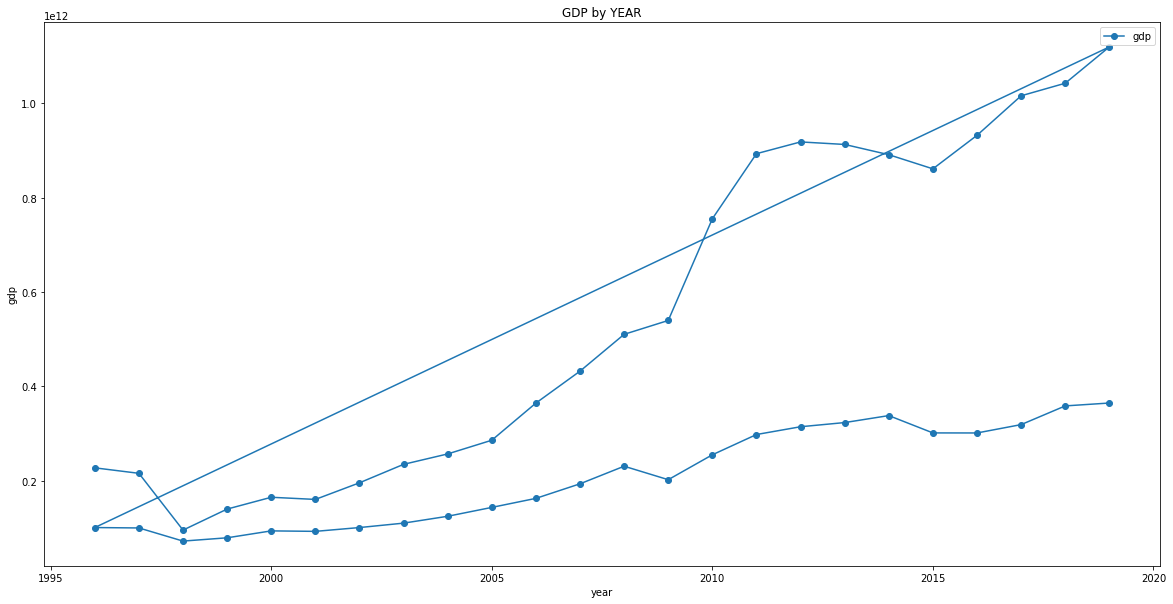

In [15]:
df.plot.line(
    x='year',
    y='gdp',
    figsize = (20, 10),
    title = 'GDP by YEAR',
    xlabel = 'year',
    ylabel = 'gdp',
    marker = 'o',
)

In [10]:
r = df.corr(method='pearson')
r

,year,life premi,non life premi,private con,gov ex,inestment,trade,inflation,gdp
year,1.000000,0.284385,-0.203847,0.054894,0.357341,0.085457,-0.297416,-0.356086,0.698640
life premi,0.284385,1.000000,0.839343,-0.761625,0.875342,-0.288123,0.748003,-0.454839,-0.230009
non life premi,-0.203847,0.839343,1.000000,-0.782999,0.704404,-0.204892,0.889046,-0.304518,-0.562462
private con,0.054894,-0.761625,-0.782999,1.000000,-0.739261,0.037509,-0.848607,0.400974,0.260925
gov ex,0.357341,0.875342,0.704404,-0.739261,1.000000,-0.228432,0.688170,-0.573064,-0.194736
inestment,0.085457,-0.288123,-0.204892,0.037509,-0.228432,1.000000,-0.365418,-0.010364,0.569987
trade,-0.297416,0.748003,0.889046,-0.848607,0.688170,-0.365418,1.000000,-0.211247,-0.678058
inflation,-0.356086,-0.454839,-0.304518,0.400974,-0.573064,-0.010364,-0.211247,1.000000,-0.150778
gdp,0.698640,-0.230009,-0.562462,0.260925,-0.194736,0.569987,-0.678058,-0.150778,1.000000


In [13]:
r_square = r**2
r_square

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,year,life premi,non life premi,private con,gov ex,inestment,trade,inflation,gdp
year,1.000000,0.284385,-0.203847,0.054894,0.357341,0.085457,-0.297416,-0.356086,0.698640
life premi,0.284385,1.000000,0.839343,-0.761625,0.875342,-0.288123,0.748003,-0.454839,-0.230009
non life premi,-0.203847,0.839343,1.000000,-0.782999,0.704404,-0.204892,0.889046,-0.304518,-0.562462
private con,0.054894,-0.761625,-0.782999,1.000000,-0.739261,0.037509,-0.848607,0.400974,0.260925
gov ex,0.357341,0.875342,0.704404,-0.739261,1.000000,-0.228432,0.688170,-0.573064,-0.194736
inestment,0.085457,-0.288123,-0.204892,0.037509,-0.228432,1.000000,-0.365418,-0.010364,0.569987
trade,-0.297416,0.748003,0.889046,-0.848607,0.688170,-0.365418,1.000000,-0.211247,-0.678058
inflation,-0.356086,-0.454839,-0.304518,0.400974,-0.573064,-0.010364,-0.211247,1.000000,-0.150778
gdp,0.698640,-0.230009,-0.562462,0.260925,-0.194736,0.569987,-0.678058,-0.150778,1.000000


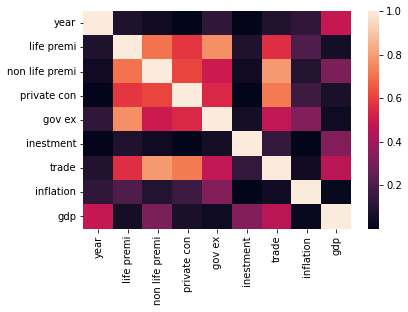

In [6]:
sns.heatmap(r_square);

In [7]:
endog = df['gdp']
model = sm.tsa.SARIMAX(endog, trend='c')
res = model.fit()

print(res.summary())

                           Statespace Model Results                           
Dep. Variable:                    gdp   No. Observations:                   48
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1304.507
Date:                Tue, 08 Mar 2022   AIC                           2615.013
Time:                        14:10:31   BIC                           2620.627
Sample:                             0   HQIC                          2617.135
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.294e+10   2.02e-14   2.62e+24      0.000    5.29e+10    5.29e+10
ar.L1          0.8544      0.021     40.212      0.000       0.813       0.896
sigma2      2.333e+22   3.06e-25   7.61e+46      0.0

In [17]:
df.tail(5)

,year,life premi,non life premi,private con,gov ex,inestment,trade,inflation,gdp
43,2015,2.84384,1.31452,53.96,13.086552,25.42,131.370052,1.218056,301355000000
44,2016,2.83470,1.24771,54.79,12.564876,26.00,126.898979,1.658326,301255000000
45,2017,2.75147,1.13985,55.39,12.179583,25.56,133.219456,3.798429,318958000000
46,2018,1.49000,0.47000,57.42,11.953578,23.61,130.502780,0.711906,358582000000
47,2019,3.35000,1.37000,59.79,11.696657,20.92,123.090951,0.079259,364702000000


In [8]:
# 5 di forecast adalah 5 tahun kedepan
fcast = res.get_forecast(5)
print(fcast.summary_frame(alpha=0.05))

gdp          mean       mean_se  mean_ci_lower  mean_ci_upper
48   3.645622e+11  1.527283e+11   6.522016e+10   6.639043e+11
49   3.644428e+11  2.008872e+11  -2.928891e+10   7.581744e+11
50   3.643407e+11  2.297578e+11  -8.597637e+10   8.146578e+11
51   3.642535e+11  2.487282e+11  -1.232447e+11   8.517517e+11
52   3.641790e+11  2.617110e+11  -1.487651e+11   8.771231e+11
